In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [146]:
pd.set_option('display.max_columns', None)

In [147]:
# Reading in data

train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [148]:
train.Alley.unique() # Fill NaNs with 'None'
train.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [149]:
train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [106]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train.isna().sum().index,train.isna().sum().values))


[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 259),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1369),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 38),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAb

<AxesSubplot:>

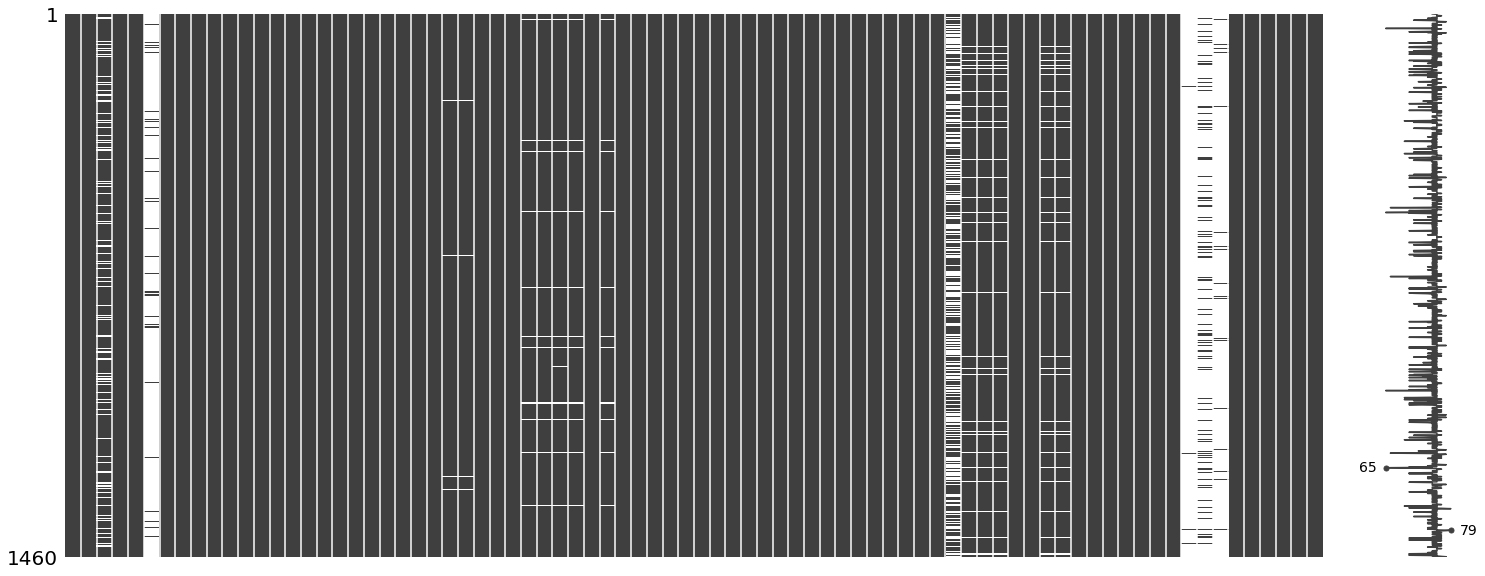

In [107]:
msno.matrix(train)

In [124]:
cat_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
               'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',\
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',\
               'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',\
               'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
num_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',\
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',\
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',\
               'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',\
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'
               ]

# Removing some features with a lot of missing values
cat_features.remove('FireplaceQu')
cat_features.remove('PoolQC')
cat_features.remove('Fence')
cat_features.remove('MiscFeature')

num_features.remove('LotFrontage')


In [125]:
# Some basic fillling
train.Alley.fillna('None',inplace=True)
test.Alley.fillna('None',inplace=True)

In [157]:
def fill_missing_basic(df, num_cols, object_cols):
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    object_dict = {k:v[0] for k, v in df[object_cols].mode().to_dict().items()}
    df[object_cols] = df[object_cols].fillna(object_dict)
    return df[num_cols+object_cols]

In [158]:
train_df = fill_missing_basic(train,num_features,cat_features)
test_df = fill_missing_basic(test,num_features[:-1],cat_features)

In [159]:
# # Only lose a bit more than 100 obs when dropping NaNs
# train[cat_features+num_features].count()[1], train[cat_features+num_features].dropna().count()[1]


In [160]:
# train_df = train[cat_features+num_features].dropna()
# test_df = test[cat_features+num_features[:-1]].dropna()

In [161]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train_df.isna().sum().index,train_df.isna().sum().values))

[('LotArea', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('MasVnrArea', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAbvGr', 0),
 ('TotRmsAbvGrd', 0),
 ('Fireplaces', 0),
 ('GarageYrBlt', 0),
 ('GarageCars', 0),
 ('GarageArea', 0),
 ('WoodDeckSF', 0),
 ('OpenPorchSF', 0),
 ('EnclosedPorch', 0),
 ('3SsnPorch', 0),
 ('ScreenPorch', 0),
 ('PoolArea', 0),
 ('MiscVal', 0),
 ('MoSold', 0),
 ('YrSold', 0),
 ('SalePrice', 0),
 ('MSSubClass', 0),
 ('MSZoning', 0),
 ('Street', 0),
 ('Alley', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('E

## Using CatBoostRegressor

In [162]:
from catboost import CatBoostRegressor, Pool
from catboost.utils import get_roc_curve

In [163]:
model = CatBoostRegressor(verbose=False)

In [164]:
train_df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,60,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,20,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,60,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,70,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,60,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,60,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,70,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [165]:
test_df.iloc[56].to_frame().T

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1517,11380,6,8,1966,2008,216,944,0,136,1080,1128,0,0,1128,1,0,1,0,2,1,5,1,1966,1,315,238,0,0,0,0,0,1500,1,2010,85,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [166]:
len(test_df.columns)

74

In [167]:
len(cat_features+num_features)

75

In [168]:
# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(train_df.drop('SalePrice',axis=1),train_df.SalePrice,cat_features=cat_features)
catboost_pool_test = Pool(test_df,cat_features=cat_features)

In [60]:
# ## Removing unimportant features

# model.select_features(
#     catboost_pool_train
#     ,features_for_select=list(train_df.drop('SalePrice',axis=1).columns)
#     ,steps=5
#     ,num_features_to_select=12
#     ,algorithm='RecursiveByShapValues'
#     ,shap_calc_type='Exact')

Learning rate set to 0.042871
Step #1 out of 5
Feature #26 eliminated
Feature #54 eliminated
Feature #14 eliminated
Feature #70 eliminated
Feature #35 eliminated
Feature #36 eliminated
Feature #29 eliminated
Feature #16 eliminated
Feature #51 eliminated
Feature #25 eliminated
Feature #2 eliminated
Feature #7 eliminated
Feature #34 eliminated
Feature #3 eliminated
Feature #12 eliminated
Feature #67 eliminated
Feature #20 eliminated
Feature #13 eliminated
Feature #58 eliminated
Feature #27 eliminated
Feature #10 eliminated
Feature #22 eliminated
Step #2 out of 5
Feature #11 eliminated
Feature #66 eliminated
Feature #69 eliminated
Feature #28 eliminated
Feature #19 eliminated
Feature #32 eliminated
Feature #72 eliminated
Feature #6 eliminated
Feature #53 eliminated
Feature #56 eliminated
Feature #46 eliminated
Feature #17 eliminated
Feature #31 eliminated
Feature #4 eliminated
Feature #37 eliminated
Feature #15 eliminated
Step #3 out of 5
Feature #57 eliminated
Feature #24 eliminated
Feat

{'selected_features': [8, 21, 30, 39, 40, 42, 43, 45, 48, 49, 50, 52],
 'eliminated_features_names': ['Heating',
  'BsmtHalfBath',
  'RoofMatl',
  'MiscVal',
  'GarageCond',
  'PavedDrive',
  'Electrical',
  'Exterior2nd',
  'LowQualFinSF',
  'BsmtFinType2',
  'Street',
  'LandSlope',
  'GarageQual',
  'Alley',
  'HouseStyle',
  '3SsnPorch',
  'Foundation',
  'RoofStyle',
  'KitchenAbvGr',
  'HeatingQC',
  'Condition2',
  'BsmtCond',
  'BldgType',
  'EnclosedPorch',
  'PoolArea',
  'CentralAir',
  'ExterCond',
  'GarageType',
  'YrSold',
  'LotConfig',
  'BsmtFullBath',
  'HalfBath',
  'BsmtFinSF2',
  'MasVnrType',
  'Functional',
  'LotShape',
  'SaleType',
  'Exterior1st',
  'BedroomAbvGr',
  'BsmtFinType1',
  'ScreenPorch',
  'WoodDeckSF',
  'LandContour',
  'MasVnrArea',
  'Condition1',
  'MoSold',
  'TotRmsAbvGrd',
  'MSSubClass',
  'FullBath',
  'BsmtUnfSF',
  'OpenPorchSF',
  'SaleCondition',
  'GarageFinish',
  'MSZoning',
  'OverallCond',
  'GarageYrBlt',
  'BsmtExposure',
  '

In [169]:
model.fit(catboost_pool_train)

In [170]:
# Initial submission without any refinement
preds_class = model.predict(catboost_pool_test)

In [171]:
pd.DataFrame(preds_class,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission.csv',index=False)